## Multi-class Image Classification using CNN in Keras 

In [ ]:
# Step 1: Import necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import shutil


### Let's make a validation set from the training set

In [2]:
# Step 2: Load and preprocess the Flower Recognition dataset

# Path to a folder containing images divided into subfolders for each class
base_path = '/Users/yashakaushal/Documents/Projects/image_classification/flowers/'
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'validation')
test_path =  os.path.join(base_path, 'test')


In [3]:
# Create validation folder 

if not os.path.exists(validation_path):
    os.makedirs(validation_path)

if not os.path.exists(test_path):
    os.makedirs(test_path)


In [4]:
# List all class folders in the training directory

class_folders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
class_folders

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']

In [5]:
# Set the percentage of data to move to the validation set

validation_split = 0.1
test_split = 0.1

In [6]:
# Loop through each class folder and move a portion of images to the validation set
# Run only once

for class_folder in class_folders:
    class_images_path = os.path.join(train_path, class_folder)
    all_images = os.listdir(class_images_path)

    # Use train_test_split to split images into training, validation, and test
    remaining_images, test_images = train_test_split(all_images, test_size=test_split, random_state=42)
    train_images, validation_images = train_test_split(remaining_images, test_size=validation_split/(1-test_split), random_state=42)

    # Create a folder in the validation directory for the current class
    class_validation_path = os.path.join(validation_path, class_folder)
    if not os.path.exists(class_validation_path):
        os.makedirs(class_validation_path)

    # Create a folder in the test directory for the current class
    class_test_path = os.path.join(test_path, class_folder)
    if not os.path.exists(class_test_path):
        os.makedirs(class_test_path)

    # Move validation images to the validation folder
    for img in validation_images:
        source_path = os.path.join(class_images_path, img)
        destination_path = os.path.join(class_validation_path, img)
        shutil.move(source_path, destination_path)

    # Move test images to the test folder
    for img in test_images:
        source_path = os.path.join(class_images_path, img)
        destination_path = os.path.join(class_test_path, img)
        shutil.move(source_path, destination_path)

print("Validation and test sets created successfully.")

Validation and test sets created successfully.


In [100]:
# Using ImageDataGenerator for data augmentation and preprocessing

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [101]:
train_generator = datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
validation_generator = datagen.flow_from_directory(validation_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
test_generator = datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='categorical')


Found 2193 images belonging to 5 classes.
Found 276 images belonging to 5 classes.
Found 277 images belonging to 5 classes.


In [9]:
# Checking the contents of generator (here taking validation for example) - 

# Retrieve a batch of data from the generator
batch = next(validation_generator)

# Print or inspect the contents of the batch
images, labels = batch
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (32, 64, 64, 3)
Labels shape: (32, 5)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

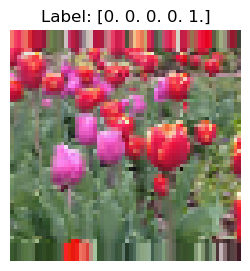

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

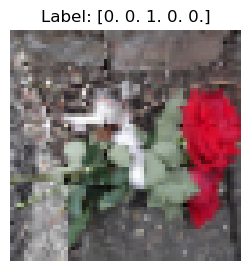

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

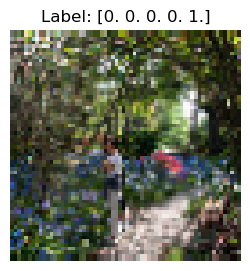

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

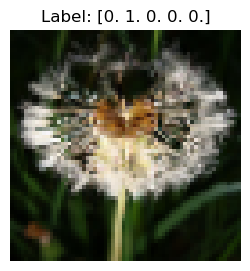

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

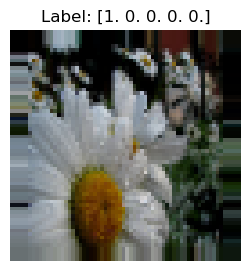

In [12]:
# Unpack the batch into images and labels
images, labels = batch

# Display the first few images from the batch
num_images_to_display = 5

for i in range(num_images_to_display):
    plt.figure(figsize=(3, 3))
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
    plt.show()


### Let's build and train a CNN Model 

### MODEL - 1 

In [16]:
# Step 3: Build the CNN model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [17]:
# Step 4: Train the CNN model

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
69/69 [==============================] - 11s 148ms/step - loss: 1.3203 - accuracy: 0.4177 - val_loss: 1.2140 - val_accuracy: 0.4746
Epoch 2/10
69/69 [==============================] - 9s 127ms/step - loss: 1.1089 - accuracy: 0.5559 - val_loss: 1.0960 - val_accuracy: 0.5507
Epoch 3/10
69/69 [==============================] - 9s 126ms/step - loss: 0.9965 - accuracy: 0.6065 - val_loss: 0.9941 - val_accuracy: 0.5652
Epoch 4/10
69/69 [==============================] - 9s 128ms/step - loss: 0.9262 - accuracy: 0.6325 - val_loss: 0.9341 - val_accuracy: 0.6087
Epoch 5/10
69/69 [==============================] - 9s 132ms/step - loss: 0.8874 - accuracy: 0.6548 - val_loss: 0.9782 - val_accuracy: 0.6014
Epoch 6/10
69/69 [==============================] - 9s 136ms/step - loss: 0.7840 - accuracy: 0.6949 - val_loss: 0.9726 - val_accuracy: 0.6014
Epoch 7/10
69/69 [==============================] - 11s 153ms/step - loss: 0.7514 - accuracy: 0.7095 - val_loss: 0.9265 - val_accuracy: 0.6449
Epoc

In [18]:
# Step 5: Evaluate the model on the test set

test_generator = datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
y_true = test_generator.classes

y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)



Found 277 images belonging to 5 classes.
9/9 [==============================] - 1s 109ms/step


<IPython.core.display.Javascript object>

In [19]:
# Classification Report
class_labels = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))


              precision    recall  f1-score   support

       daisy       0.14      0.14      0.14        51
   dandelion       0.30      0.29      0.29        65
        rose       0.16      0.16      0.16        50
   sunflower       0.29      0.30      0.29        50
       tulip       0.30      0.30      0.30        61

    accuracy                           0.24       277
   macro avg       0.24      0.24      0.24       277
weighted avg       0.24      0.24      0.24       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

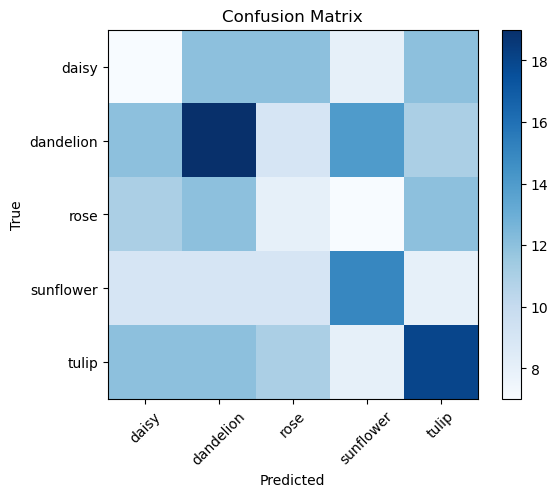

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

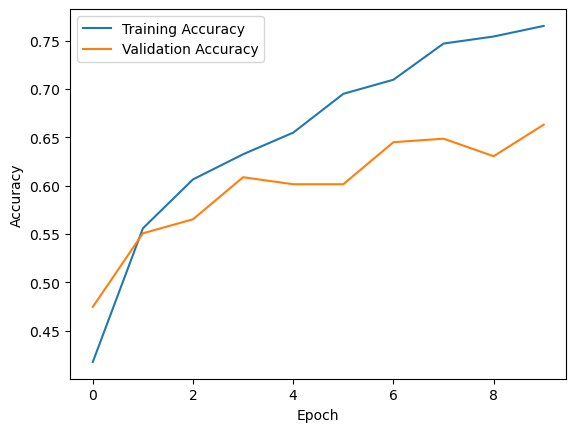

In [20]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### MODEL - 2 
Let's increase the complexity of our model to help it learn finer features in the n-dimensional space and provide better accuracy and precision. 

In [102]:
validation_generator = datagen.flow_from_directory(validation_path, target_size=(64, 64), batch_size=64, class_mode='categorical')
test_generator = datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=64, class_mode='categorical')


Found 276 images belonging to 5 classes.
Found 277 images belonging to 5 classes.


In [103]:
train_generator = datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=64, class_mode='categorical')


Found 2193 images belonging to 5 classes.


In [112]:
# Step 3: Build new CNN model with more dense layers, dropout layers and 

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Input layer
input_layer = Input(shape=(64, 64, 3))

# Convolutional layers without BatchNormalization
x = Conv2D(32, (3, 3))(input_layer)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten layer
x = Flatten()(x)

# Dense layers without BatchNormalization
x = Dense(256)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization

x = Dense(128)(x)
x = Activation('relu')(x)

# Output layer
output_layer = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the model
model2 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a custom learning rate
custom_optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model2.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_15 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 activation_16 (Activation)  (None, 29, 29, 64)        0         
                                                          

In [113]:
# Step 4: Train the CNN model

history = model2.fit(train_generator, epochs=15, validation_data=validation_generator)


Epoch 1/15
35/35 [==============================] - 10s 275ms/step - loss: 1.4410 - accuracy: 0.3393 - val_loss: 1.2070 - val_accuracy: 0.4783
Epoch 2/15
35/35 [==============================] - 9s 255ms/step - loss: 1.2296 - accuracy: 0.4770 - val_loss: 1.1811 - val_accuracy: 0.5036
Epoch 3/15
35/35 [==============================] - 9s 255ms/step - loss: 1.1586 - accuracy: 0.5221 - val_loss: 1.1144 - val_accuracy: 0.5181
Epoch 4/15
35/35 [==============================] - 9s 250ms/step - loss: 1.0591 - accuracy: 0.5572 - val_loss: 0.9930 - val_accuracy: 0.5906
Epoch 5/15
35/35 [==============================] - 9s 250ms/step - loss: 0.9742 - accuracy: 0.6078 - val_loss: 0.9315 - val_accuracy: 0.5870
Epoch 6/15
35/35 [==============================] - 9s 255ms/step - loss: 0.9589 - accuracy: 0.6206 - val_loss: 0.9556 - val_accuracy: 0.6341
Epoch 7/15
35/35 [==============================] - 9s 253ms/step - loss: 0.9502 - accuracy: 0.6197 - val_loss: 0.8860 - val_accuracy: 0.6232
Epoch

In [114]:
# Step 5: Evaluate the model on the test set

test_generator = datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=64, class_mode='categorical')
y_true = test_generator.classes

y_pred_prob = model2.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)



Found 277 images belonging to 5 classes.
5/5 [==============================] - 1s 148ms/step


<IPython.core.display.Javascript object>

In [115]:
# Classification Report
class_labels = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))


              precision    recall  f1-score   support

       daisy       0.18      0.22      0.20        51
   dandelion       0.29      0.25      0.27        65
        rose       0.21      0.20      0.21        50
   sunflower       0.23      0.24      0.23        50
       tulip       0.23      0.23      0.23        61

    accuracy                           0.23       277
   macro avg       0.23      0.23      0.23       277
weighted avg       0.23      0.23      0.23       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

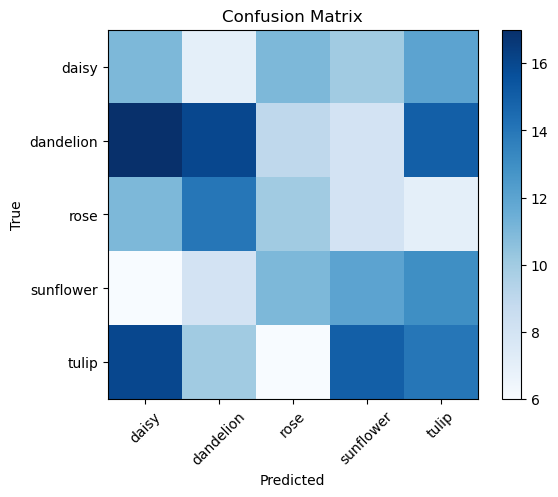

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

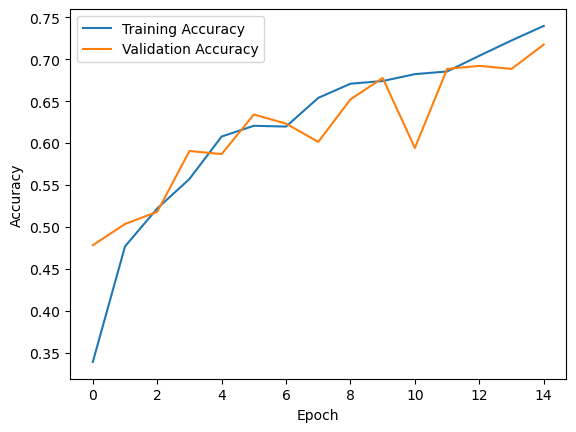

In [116]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### NOTE - 
1. Inreasing complexity of the model by adding additional dense layers (and drop out layers) does not always help in better learning. 
2. We tested various ranges of hyperparameters like number of epochs (5,10,15,20) and learning rate (0.1, 0.001, 0.0001) and find above choices optimized for maximum accuracy and precision. 
3. For this specific study, having more data might be useful as our train set, test set and validation set has only 2193, 277 and 276 images repsectively 
